In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
import requests
from PIL import Image
import cv2
np.random.seed(7)



In [2]:
# importing 60K images for training and 10K images for testing
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [3]:
# assert checks if the conidition is met, and when not met it displays an error message of our choice
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

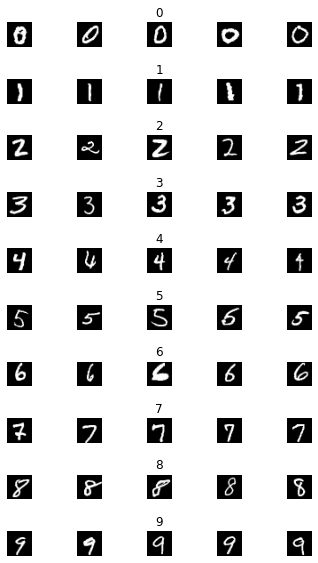

In [4]:
# list to record the no. of images in each of the 10 categories
num_of_samples = []
# creating a grid of 5 columns
cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()
# columns
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))
        

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

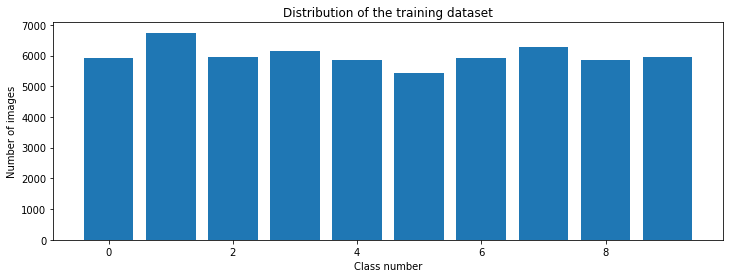

In [5]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [6]:
# using one-hot encoding to ensure that the model does not assume any relation between other classes
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# divide by 255 since each images' pixel intensities range from 0-255 and the max. values gets restricted to 1
# this scales down the features and reduces the variance
X_train = X_train/255 
X_test = X_test/255

# flattening the array into 784 columns of pixels
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [7]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


d:\Self Driving 1\autonomous1\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [8]:
# CNNs are more computationally manageable
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

Epoch 1/10
270/270 [==============================] - 4s 9ms/step - loss: 0.5474 - accuracy: 0.8296 - val_loss: 0.2219 - val_accuracy: 0.9390
Epoch 2/10
270/270 [==============================] - 2s 6ms/step - loss: 0.2643 - accuracy: 0.9209 - val_loss: 0.1981 - val_accuracy: 0.9438
Epoch 3/10
270/270 [==============================] - 1s 5ms/step - loss: 0.2362 - accuracy: 0.9295 - val_loss: 0.2015 - val_accuracy: 0.9375
Epoch 4/10
270/270 [==============================] - 2s 6ms/step - loss: 0.2193 - accuracy: 0.9337 - val_loss: 0.1814 - val_accuracy: 0.9472
Epoch 5/10
270/270 [==============================] - 1s 5ms/step - loss: 0.2051 - accuracy: 0.9384 - val_loss: 0.1778 - val_accuracy: 0.9515
Epoch 6/10
270/270 [==============================] - 2s 6ms/step - loss: 0.1996 - accuracy: 0.9395 - val_loss: 0.1669 - val_accuracy: 0.9525
Epoch 7/10
270/270 [==============================] - 1s 5ms/step - loss: 0.1946 - accuracy: 0.9404 - val_loss: 0.1750 - val_accuracy: 0.9505
Epoch 

Text(0.5, 0, 'epoch')

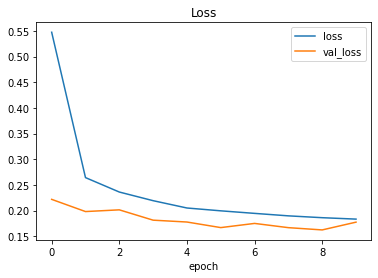

In [9]:
"""
As the epochs increase, the training and validation loss approach each other. After a certain value of epochs, the training loss is lower than
the validation loss, which is a sign of overfitting.

"""
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'Epoch')

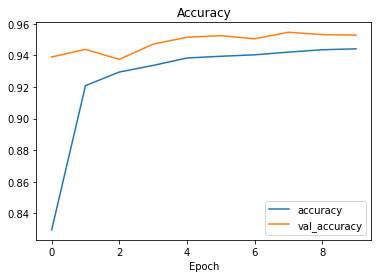

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')

In [11]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.2089247852563858
Test accuracy: 0.9412000179290771


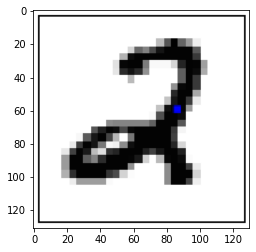

In [12]:
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

predicted digit: [2]


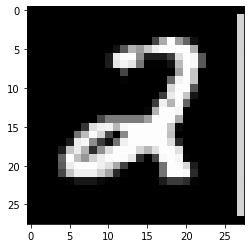

In [13]:
# reshaping the image to 28 x 28 pixels
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
img = img/255
img = img.reshape(1, 784)

# using this format since predict_classes has been deprecated
prediction = np.argmax(model.predict(img), axis=-1)
print("predicted digit:", str(prediction))